# Plotting multiple images at once

plt.subplots: create a figure canvas with multiple AxesSubplots objects.

In [1]:
import imageio

vol = imageio.volread('../../data/dicom/circle_of_willis/Circle of Willis', 'DICOM')

Reading DICOM (examining files): 1/138 files (0.75/138 files (3.69/138 files (6.514/138 files (10.119/138 files (13.824/138 files (17.427/138 files (19.630/138 files (21.732/138 files (23.236/138 files (26.140/138 files (29.044/138 files (31.948/138 files (34.851/138 files (37.054/138 files (39.157/138 files (41.359/138 files (42.861/138 files (44.265/138 files (47.168/138 files (49.372/138 files (52.276/138 files (55.180/138 files (58.082/138 files (59.483/138 files (60.186/138 files (62.388/138 files (63.892/138 files (66.794/138 files (68.197/138 files (70.399/138 files (71.7101/138 files (73.2%105/138 files (76.1%108/138 files (78.3%111/138 files (80.4%114/138 files (82.6%116/138 files (84.1%119/138 files (86.2%124/138 files (89.9%128/138 files (92.8%132/138 files (95.7%136/138 files (98.6%138/138 files (100.0%)
  Found 2 correct series.
Reading DICOM (loading data): 17/29  (58.629/29  (100.0%)


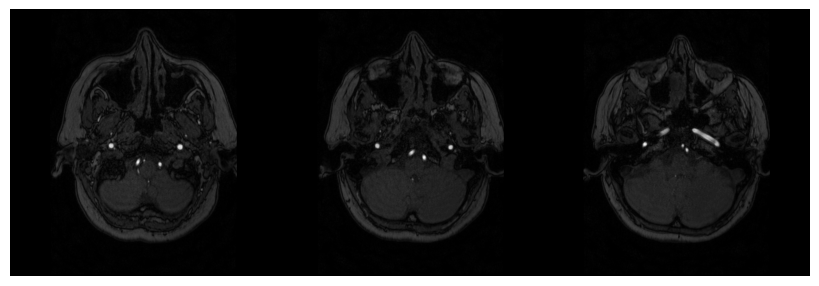

In [3]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 3.5))
axes[0].imshow(vol[0], cmap='gray')
axes[1].imshow(vol[10], cmap='gray')
axes[2].imshow(vol[20], cmap='gray')

for ax in axes:
    ax.axis('off')

plt.subplots_adjust(wspace=0, hspace=0, left=0, right=1, bottom=0, top=1)
plt.show()


In [4]:
pln = 10
row = 100
col = 100

# Axial
view_1v2 = vol[pln, :, :]
view_1v2 = vol[pln]

# second perspective, Coronal
view_0v2 = vol[:, row, :]
# 3rd view, Sagittal
view_0v1 = vol[:, :, col]

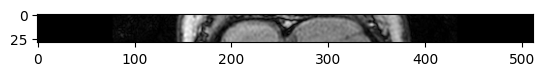

In [7]:
#coronal view
coronal = vol[:, 400, :]
plt.imshow(coronal, cmap='gray')
plt.show()

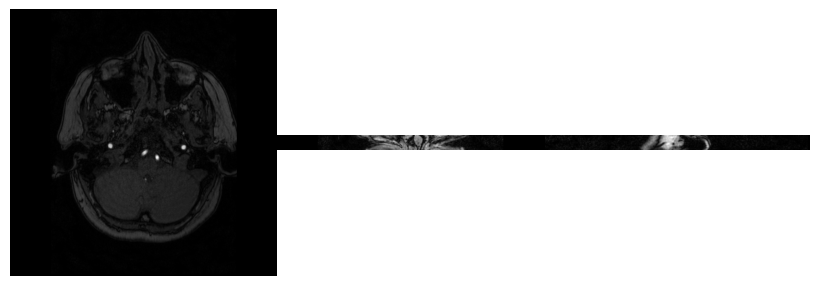

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 3.5))
axes[0].imshow(view_1v2, cmap='gray')
axes[1].imshow(view_0v2, cmap='gray')
axes[2].imshow(view_0v1, cmap='gray')

for ax in axes:
    ax.axis('off')

plt.subplots_adjust(wspace=0, hspace=0, left=0, right=1, bottom=0, top=1)
plt.show()

### Modifying the aspect ration
pixels may adopt any aspect ration

In [8]:
im = vol[:, :, 100]
d0, d1, d2 = vol.meta['sampling']
print(d0, d1, d2)

0.7000002179826856 0.44921875 0.44921875


In [9]:
asp = d0 / d1
asp

1.5582613548136306

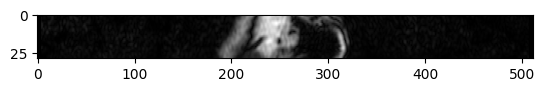

In [10]:
plt.imshow(im, cmap='gray', aspect=asp)
plt.show()

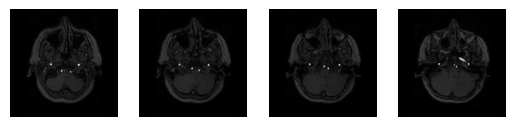

In [14]:
# Plot the images on a subplots array 
fig, axes = plt.subplots(nrows=1,ncols=4)

# Loop through subplots and draw image
for ii in range(4):
    im = vol[ii*6]
    axes[ii].imshow(im, cmap='gray')
    axes[ii].axis('off')
    
# Render the figure
plt.show()

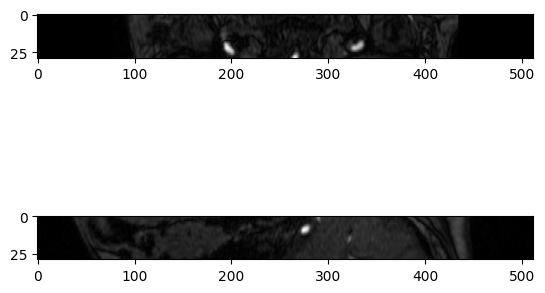

In [15]:
# Select frame from "vol"
im1 = vol[:, 256, :]
im2 = vol[:, :, 256]

# Compute aspect ratios
d0, d1, d2 = vol.meta['sampling']
asp1 = d0 / d2
asp2 = d0 / d1

# Plot the images on a subplots array 
fig, axes = plt.subplots(nrows=2, ncols=1)
axes[0].imshow(im1, cmap='gray', aspect=asp1)
axes[1].imshow(im2, cmap='gray', aspect=asp2)
plt.show()